In [1]:
import scipy.io
import numpy as np

# Load the .mat file
mat_data = scipy.io.loadmat('assets/current_data_mutual_info_3.mat')

print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CombinedCurrent', 'CombinedCurrentPlus', 'allData', 'allData2', 'ballDataSep2', 'ballDataSep3', 'current1', 'current10', 'current11', 'current2', 'current3', 'current4', 'current5', 'current6', 'current7', 'current8', 'current9', 'currentCon5', 'currentCon6', 'currentCon7', 'currentCon8', 'currentCon9', 'currentVoid1', 'currentVoid2', 'currentVoid3', 'currentVoid4', 'currentVoid7', 'defults', 'mutInfoEnc2Curr', 'mutInfoEnc2CurrSep', 'mutInfoEnc2Pos', 'mutInfoEnc2PosDelaySep', 'mutInfoEnc2PosDelaySep_2', 'mutInfoEnc2PosSep', 'mutInfoEnc2PosSep2', 'mutInfoPaddleDiff', 'mutInfoPaddleDiff_2', 'mutInfoStime2Curr', 'mutInfoStime2Curr_2', 'paddleData', 'paddleData2', 'paddleDataSep2', 'rawDataBot', 'rawDataMid', 'rawDataTop', 'testData', 'testData_2', 'testData_3', 'timeCutoff', 'window'])


In [2]:
CombinedCurrent = mat_data['CombinedCurrent']

paddle_data = mat_data['paddleData']

print(CombinedCurrent.shape)
print(CombinedCurrent[0,0].shape)
print("------------")
print(paddle_data.shape)
print(paddle_data[0,0].shape)

(1, 11)
(7227, 10)
------------
(205929, 3)
()


In [3]:
import pandas as pd

run0 = CombinedCurrent[0,0]

run0_df = pd.DataFrame(run0)
run0_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,-1.0,0.0,0.0,0.0,0.0,0.9,0.6,0.7,2386.0
1,0.0,-1.0,0.0,0.0,0.0,0.0,0.7,0.8,0.5,2854.0
2,0.0,-1.0,0.0,0.0,0.0,0.0,0.5,0.8,0.7,3064.0
3,0.0,-1.0,0.0,0.0,0.0,0.0,0.5,0.6,0.3,3299.0
4,0.0,-1.0,0.0,0.0,0.0,-1.0,0.5,1.0,0.4,3523.0


In [4]:
paddle_df = pd.DataFrame(paddle_data)
paddle_df.head(30)

,0,1,2
0,2.386,1000.0,2.0
1,2.854,596.0,2.0
2,3.064,772.0,2.0
3,3.299,596.0,2.0
4,3.523,549.0,34.0
5,3.741,509.0,34.0
6,3.963,1000.0,32.0
7,4.187,333.0,32.0
8,4.399,519.0,32.0
9,4.614,1000.0,32.0


KeyboardInterrupt: 

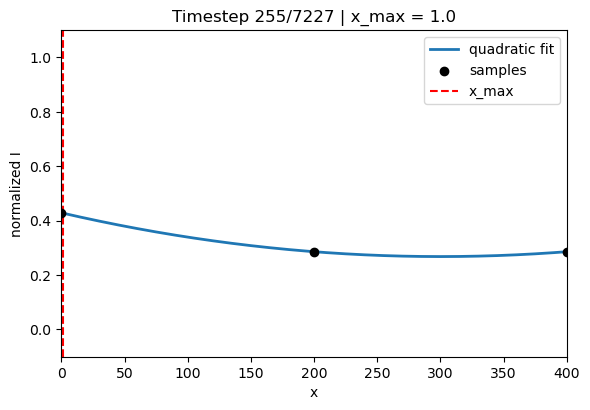

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Optional: quick check of your backend
# import matplotlib
# print(matplotlib.get_backend())

x_space = np.linspace(0, 400, 401)
xs_samples = np.array([0, 200, 400])

fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot([], [], lw=2, color='tab:blue', label='quadratic fit')
scat = ax.scatter(xs_samples, [np.nan, np.nan, np.nan], color='k', zorder=3, label='samples')
vline = ax.axvline(x=np.nan, color='r', linestyle='--', label='x_max')

ax.set_xlim(0, 400)
ax.set_ylim(-0.1, 1.1)  # adjust if your values exceed this
ax.set_xlabel('x')
ax.set_ylabel('normalized I')
ax.legend(loc='upper right')
fig.tight_layout()

for t in range(len(run0)):
    Is = run0[t, [6, 7, 8]].astype(float)
    s = Is.sum()
    if s > 0:
        Is /= s

    a, b, c = np.polyfit(xs_samples, Is, 2)
    y = a * x_space**2 + b * x_space + c
    x_max = x_space[np.argmax(y)]

    # Update artists
    line.set_data(x_space, y)
    scat.set_offsets(np.column_stack((xs_samples, Is)))
    if x_max == 0: 
        x_max = 1
    vline.set_xdata([x_max, x_max])

    ax.set_title(f'Timestep {t+1}/{len(run0)} | x_max = {x_max:.1f}')

    # Refresh the single output
    fig.canvas.draw()
    clear_output(wait=True)
    display(fig)
    time.sleep(0.05)

plt.close(fig)

In [ ]:
paddle = mat_data['paddleDataSep2']
ball = mat_data['ballDataSep3']

print(paddle[0,0].shape)
print(ball[0,0].shape)

run_num = 0

paddle_run = paddle[0, run_num]
ball_run = ball[0, run_num]


(7226, 3)
(6446, 2)


In [ ]:
enc = mat_data['mutInfoEnc2PosDelaySep_2']

enc_df = pd.DataFrame(enc[0,run_num])
enc_df

,0,1
0,6.028802e+04,271.90
1,6.052399e+04,295.92
2,6.076009e+04,319.66
3,6.099621e+04,317.12
4,6.123236e+04,319.39
...,...,...
17293,4.023833e+06,189.01
17294,4.024053e+06,185.52
17295,4.024273e+06,186.49
17296,4.024493e+06,185.05


In [ ]:
paddle_df = pd.DataFrame(paddle_run)
ball_df = pd.DataFrame(ball_run)

In [ ]:
paddle_df

,0,1,2
0,2.386,1000.0,2.0
1,2.854,596.0,2.0
2,3.064,772.0,2.0
3,3.299,596.0,2.0
4,3.523,549.0,34.0
...,...,...,...
7221,1721.589,0.0,16.0
7222,1721.812,0.0,16.0
7223,1722.040,1000.0,16.0
7224,1722.262,0.0,16.0


In [ ]:
ball_df.head(30)

,0,1
0,2.386,2.0
1,2.854,2.0
2,3.064,2.0
3,3.299,2.0
4,3.963,6.0
5,4.187,6.0
6,4.399,6.0
7,4.614,6.0
8,4.823,6.0
9,5.037,6.0


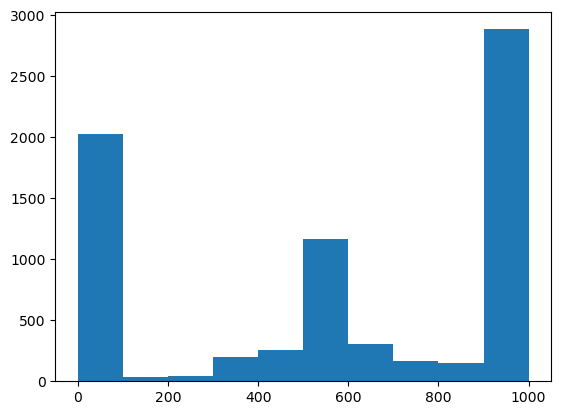

In [ ]:
plt.hist(paddle_df.iloc[:,1])
plt.show()


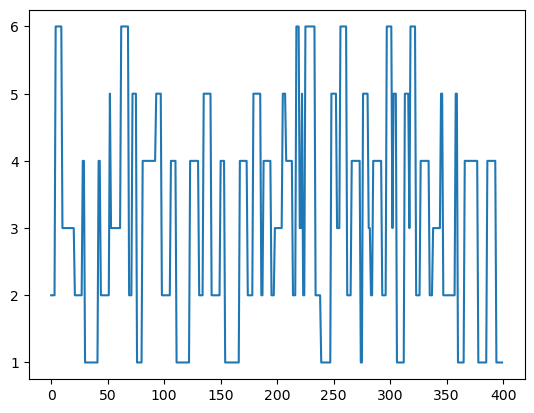

In [ ]:
plt.plot(ball_df.iloc[:400,1])
plt.show()